In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# All Fall Major Stats 

In [15]:
rlcs_data = pd.read_csv('rlcs-fall-major-data.csv')
print(rlcs_data)

         team name  games  wins  win percentage  score  score per game  goals  \
0        RENEGADES     17     7           41.18  17685         1040.29     23   
1      GROUND ZERO     17     8           47.06  16377          963.35     22   
2       G2 ESPORTS     19     9           47.37  21888         1152.00     42   
3    TEAM VITALITY     16     5           31.25  17050         1065.62     23   
4     ENDPOINT CEX     28    14           50.00  31475         1124.11     47   
..             ...    ...   ...             ...    ...             ...    ...   
107   CHAR PHOENIX     23    11           47.83  25696         1117.22     35   
108       VIBRANCE     13     4           30.77  16442         1264.77     22   
109           XSET     16     6           37.50  17853         1115.81     29   
110            SSG     25    14           56.00  27503         1100.12     41   
111     COMPLEXITY     30    16           53.33  31265         1042.17     42   

     goals per game  assist

In [16]:
rlcs_data.head()

,team name,games,wins,win percentage,score,score per game,goals,goals per game,assists,assists per game,...,time neutral third per game,time offensive third,time offensive third per game,avg distance to ball per game,avg distance to ball has possession per game,avg distance to ball no possession per game,demos inflicted,demos inflicted per game,demos taken,demos taken per game
0,RENEGADES,17,7,41.18,17685,1040.29,23,1.35,18,1.06,...,344.67,3642.34,214.26,8920.71,8549.35,9283.35,72,4.24,51,3.00
1,GROUND ZERO,17,8,47.06,16377,963.35,22,1.29,18,1.06,...,310.02,3480.33,204.73,8624.53,8289.65,8959.24,46,2.71,51,3.00
2,G2 ESPORTS,19,9,47.37,21888,1152.00,42,2.21,37,1.95,...,377.86,4835.65,254.51,8701.95,8314.11,9130.68,64,3.37,62,3.26
3,TEAM VITALITY,16,5,31.25,17050,1065.62,23,1.44,18,1.12,...,318.86,2897.02,181.06,8169.50,7724.81,8560.31,34,2.12,56,3.50
4,ENDPOINT CEX,28,14,50.00,31475,1124.11,47,1.68,39,1.39,...,367.59,6427.12,229.54,8643.50,8278.86,8955.75,74,2.64,93,3.32


In [17]:
rlcs_data.columns

Index(['team name', 'games', 'wins', 'win percentage', 'score',
       'score per game', 'goals', 'goals per game', 'assists',
       'assists per game', 'saves', 'saves per game', 'shots',
       'shots per game', 'shots conceded', 'shots conceded per game',
       'goals conceded', 'goals conceded per game', 'shooting percentage',
       'bpm per game', 'avg boost amount per game', 'amount collected',
       'amount collected per game', 'amount collected big pads',
       'amount collected big pads per game', 'amount collected small pads',
       'amount collected small pads per game', 'count collected big pads',
       'count collected big pads per game', 'count collected small pads',
       'count collected small pads per game', 'amount stolen',
       'amount stolen per game', 'amount stolen big pads',
       'amount stolen big pads per game', 'amount stolen small pads',
       'amount stolen small pads per game', 'count stolen big pads',
       'count stolen big pads per game', '

## Total Shot Ratio (TSR)

In [18]:
print(rlcs_data[["team name","win percentage","shots per game", "shots conceded per game"]])

         team name  win percentage  shots per game  shots conceded per game
0        RENEGADES           41.18            8.06                     8.76
1      GROUND ZERO           47.06            7.00                     7.94
2       G2 ESPORTS           47.37            9.42                     7.84
3    TEAM VITALITY           31.25            7.94                    10.00
4     ENDPOINT CEX           50.00            9.18                     8.93
..             ...             ...             ...                      ...
107   CHAR PHOENIX           47.83            8.00                     8.91
108       VIBRANCE           30.77            7.08                    10.38
109           XSET           37.50            8.69                     8.06
110            SSG           56.00            8.72                     7.68
111     COMPLEXITY           53.33            8.10                     8.73

[112 rows x 4 columns]


In [19]:
win_percentage = rlcs_data["win percentage"]
shots_con_pg = rlcs_data["shots conceded per game"]
shots_pg = rlcs_data["shots per game"]

In [45]:
tsr = ((shots_pg)/(shots_pg + shots_con_pg))

## Linear Regression Model


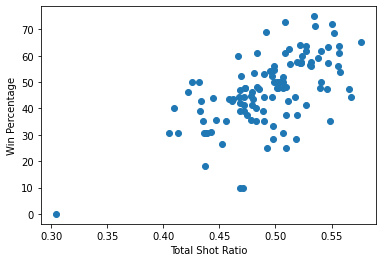

In [47]:
plt.xlabel('Total Shot Ratio')
plt.ylabel('Win Percentage')

plt.scatter(tsr,win_percentage)

In [48]:
#Test Train split for supervised training 
x_train, x_test, y_train, y_test = train_test_split(tsr, win_percentage)

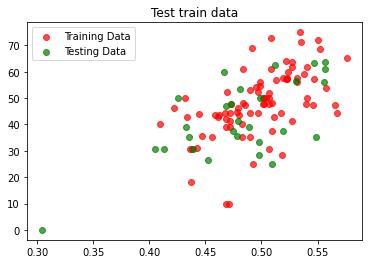

In [49]:
plt.scatter(x_train, y_train, label = 'Training Data', color = 'r', alpha =.7)
plt.scatter(x_test, y_test, label = 'Testing Data', color = 'g', alpha =.7)
plt.legend()
plt.title("Test train data")
plt.show()

In [50]:
# Create linear model and train it
LR = LinearRegression()
LR.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

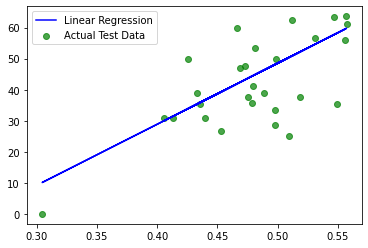

In [51]:
prediction = LR.predict(x_test.values.reshape(-1,1))

plt.plot(x_test, prediction, label = 'Linear Regression', color = 'b')
plt.scatter(x_test, y_test, label = 'Actual Test Data', color = 'g', alpha =.7)
plt.legend()
plt.show()

In [52]:
LR.predict(np.array([[.5]]))[0]

48.5349242196005

In [53]:
LR.score(x_test.values.reshape(-1,1),y_test.values)

0.42625082715262785